In [206]:
import numpy as np
import os
import matplotlib.pyplot as plt
import jpegio
%matplotlib inline

In [207]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF100_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_100'

In [208]:
def calc_residual(stego, cover):
    residual_cb = np.abs(stego.coef_arrays[1].astype(np.int16) - cover.coef_arrays[1][0:128, 0:128].astype(np.int16)).astype(np.uint8)
    residual_cr = np.abs(stego.coef_arrays[2].astype(np.int16) - cover.coef_arrays[2][0:128, 0:128].astype(np.int16)).astype(np.uint8)
    return residual_cb, residual_cr

In [233]:
def show_hist(cover_path: str, stego_path: str, count: int, multiple: int):

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:] == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_cb, residual_cr = calc_residual(stego, cover)

        cb_nnz_arr = []
        for j in range(128):
            cb_nnz_arr.extend(list(filter(lambda a: a>0, residual_cb[j])))

        cr_nnz_arr = []
        for j in range(128):
            cr_nnz_arr.extend(list(filter(lambda a: a>0, residual_cr[j])))

        count = {}
        for i in cb_nnz_arr:
            try: count[i] += 1
            except: count[i] = 1

        count_cr = {}
        for i in cr_nnz_arr:
            try: count_cr[i] += 1
            except: count_cr[i] = 1

    count = {key:value for key, value in count.items() if value > 10}
    count_cr = {key:value for key, value in count_cr.items() if value > 10}

    plt.figure(figsize=(10, 7))

    ax1 = plt.subplot(211)
    ax1.set_title("Plot of residual value count for Cb-channel", size=20)
    ax1.bar(count.keys(), count.values())

    ax2 = plt.subplot(212)
    ax2.set_title("Plot of residual value count for Cr-channel", size=20)
    ax2.bar(count_cr.keys(), count_cr.values())

    for key, value in count.items():
        ax1.text(key - 0.5 , value + 0.5, str(value)[:5])

    for key, value in count_cr.items():
        ax2.text(key - 0.5 , value + 0.5, str(value)[:5])

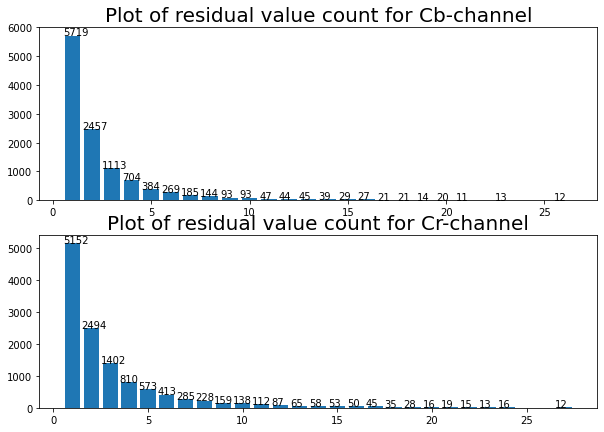

In [234]:
show_hist(cover_path, stego_path, 10, 1)

